In [28]:
df <- read.csv("casos.csv")

In [29]:
#nuevo leon, daily
as.numeric(df[19, 84:327]) -> nl.daily

In [30]:
#country, daily
as.numeric(df[33, 84:327]) -> country.daily

In [31]:
rollsum <- function(x){
    suma <- 0
    y <- suma
    for (i in 1:length(x)){
        suma <- suma + x[i]
        y <- c(y, suma)
    }
    return(y)
}

In [32]:
#nuevo leon, cumulative
nl.cum <- rollsum(nl.daily)

In [33]:
#country, cumulative
country.cum <- rollsum(country.daily)

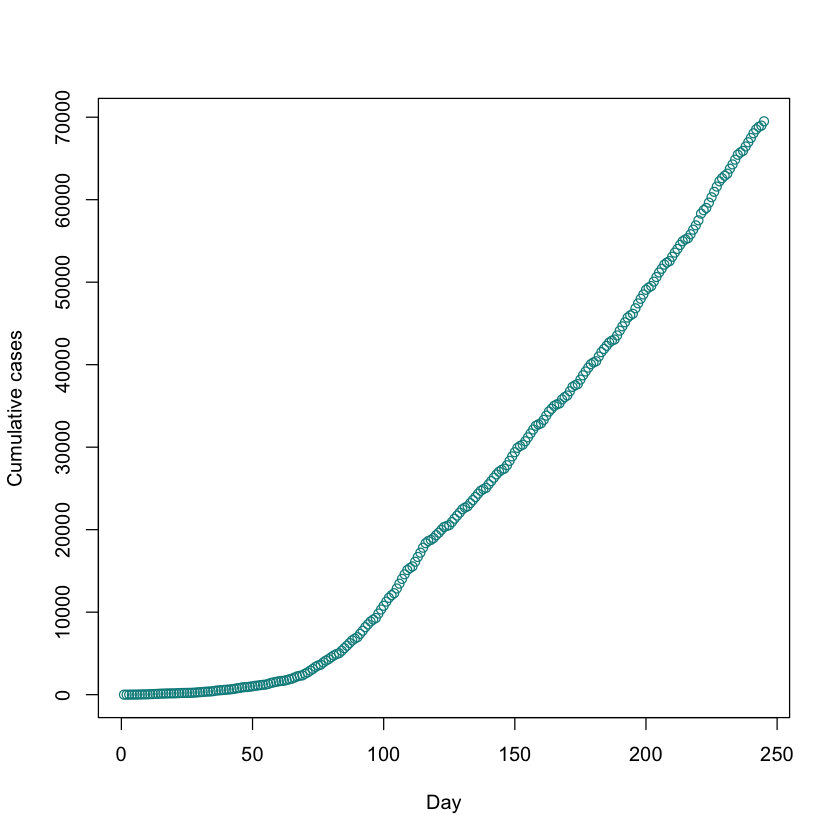

In [57]:
plot(nl.cum, ylab ="Cumulative cases", xlab="Day", col="darkcyan")
#abline(h=1800)

In [54]:
png(filename="nl_cumulative.png", height=2000, width=2000, res=400)
plot(nl.cum, ylab ="Cumulative cases", xlab="Day", col="darkcyan")
dev.off()

pdf 
  2

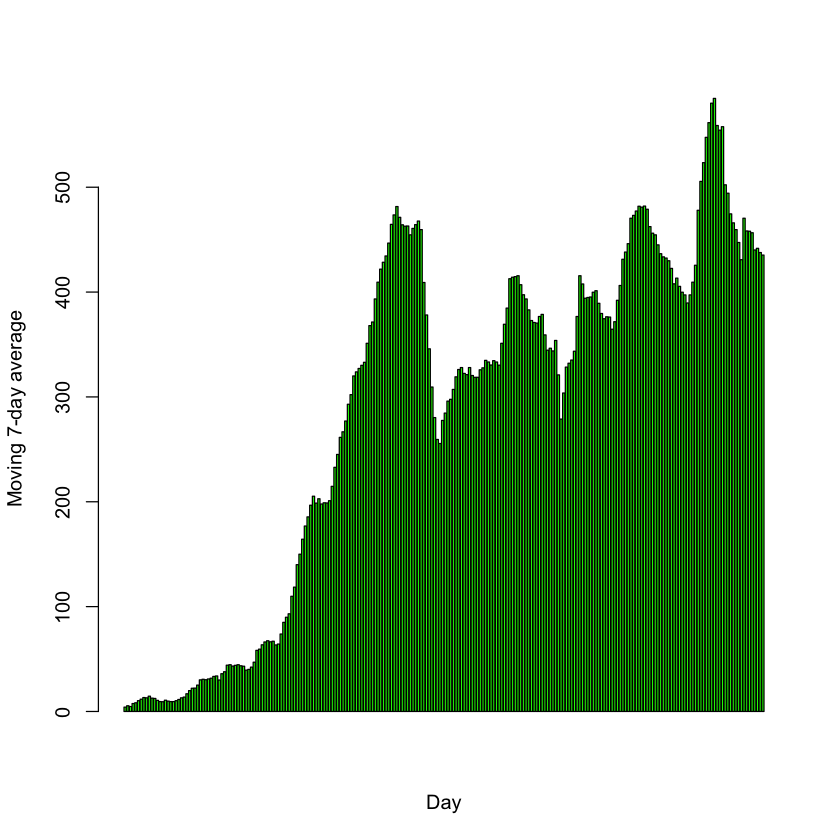

In [70]:
barplot(rollmean(nl.daily, k = 7), col="green", ylab="Moving 7-day average", xlab="Day")

In [71]:
png(filename="roll_average_nl.png", height=2000, width=2000, res=400)
barplot(rollmean(nl.daily, k = 7), col="green", ylab="Moving 7-day average", xlab="Day")
dev.off()

pdf 
  2

******************
Stochastic general epidemic model

$\lambda = .5, \gamma = 1$

$R_0 = .5$

Initially infected: 10

Total population: 1,000

In [84]:
lambda <- .5
gamma <- 1

In [85]:
inf <- 10
sus <- 1000 - inf
rec <- 0

Tf <- 500

t <- 0

sus.status <- c()
inf.status <- c()
rec.status <- c()
times <- c()

while(inf > 0 && t < Tf){
    sus.status <- c(sus.status, sus)   
    inf.status <- c(inf.status, inf)
    rec.status <- c(rec.status, rec)

    times <- c(times, t)

    tau <- rexp(n = 1, rate = lambda*sus*inf/(sus+inf+rec) + gamma*inf)

    t <- t + tau

    u <- runif(1)*(lambda*sus*inf/(sus+inf+rec) + gamma*inf)

    if (u < lambda*sus*inf/(sus+inf+rec)){
        sus <- sus - 1
        inf <- inf+1
    }
    else{
        inf <- inf-1
        rec <- rec+1
    }
}

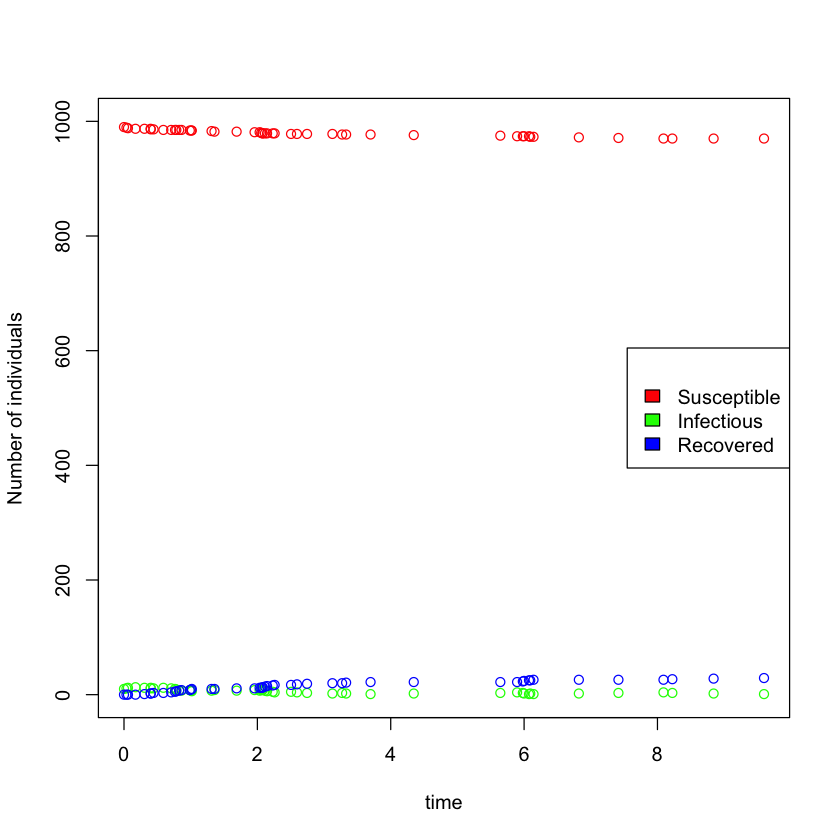

In [86]:
plot(x=times, y=sus.status, col="red", ylim=c(0, sus+inf+rec), main="", 
     ylab="Number of individuals", xlab="time")
points(x=times, y=inf.status, col="green")
points(x=times, y=rec.status, col="blue")
legend(x = "right", legend = c("Susceptible", "Infectious", "Recovered"), fill = c("red", "green","blue"), 
       title = "")

In [87]:
png(filename="trajectory_small_epidemic.png", height=2000, width=2000, res=400)
plot(x=times, y=sus.status, col="red", ylim=c(0, sus+inf+rec), main="", 
     ylab="Number of individuals", xlab="time")
points(x=times, y=inf.status, col="green")
points(x=times, y=rec.status, col="blue")
legend(x = "right", legend = c("Susceptible", "Infectious", "Recovered"), fill = c("red", "green","blue"), 
       title = "")
dev.off()

pdf 
  2

In [17]:
final.size <- c()

for (i in 1:10000){
    inf <- 10
    sus <- 1000 - inf
    rec <- 0

    Tf <- 500

    t <- 0

    sus.status <- c()
    inf.status <- c()
    rec.status <- c()
    times <- c()

    while(inf > 0 && t < Tf){
        sus.status <- c(sus.status, sus)   
        inf.status <- c(inf.status, inf)
        rec.status <- c(rec.status, rec)

        times <- c(times, t)

        tau <- rexp(n = 1, rate = lambda*sus*inf/(sus+inf+rec) + gamma*inf)

        t <- t + tau

        u <- runif(1)*(lambda*sus*inf/(sus+inf+rec) + gamma*inf)

        if (u < lambda*sus*inf/(sus+inf+rec)){
            sus <- sus - 1
            inf <- inf+1
        }
        else{
            inf <- inf-1
            rec <- rec+1
        }
    }
    
    final.size <- c(final.size, rec)
    }

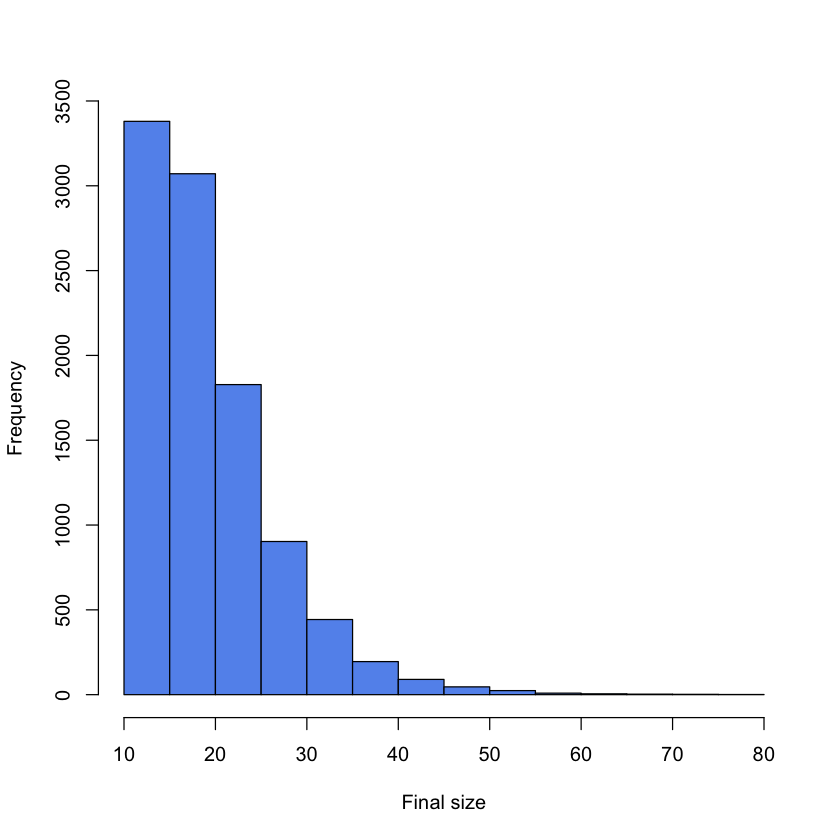

In [18]:
hist(final.size, xlab="Final size", col="cornflowerblue", main="")

In [19]:
png(filename="final_size_small_epidemic.png", height=2000, width=2000, res=400)
hist(final.size, xlab="Final size", col="cornflowerblue", main="")
dev.off()

pdf 
  2

******************
Stochastic general epidemic model

$\lambda = 1.5, \gamma = 1$

$R_0 = 1.5$

Initially infected: 10

Total population: 1,000

In [88]:
lambda <- 1.5
gamma <- 1

In [89]:
inf <- 10
sus <- 1000 - inf
rec <- 0

Tf <- 500

t <- 0

sus.status <- c()
inf.status <- c()
rec.status <- c()
times <- c()

while(inf > 0 && t < Tf){
    sus.status <- c(sus.status, sus)   
    inf.status <- c(inf.status, inf)
    rec.status <- c(rec.status, rec)

    times <- c(times, t)

    tau <- rexp(n = 1, rate = lambda*sus*inf/(sus+inf+rec) + gamma*inf)

    t <- t + tau

    u <- runif(1)*(lambda*sus*inf/(sus+inf+rec) + gamma*inf)

    if (u < lambda*sus*inf/(sus+inf+rec)){
        sus <- sus - 1
        inf <- inf+1
    }
    else{
        inf <- inf-1
        rec <- rec+1
    }
}

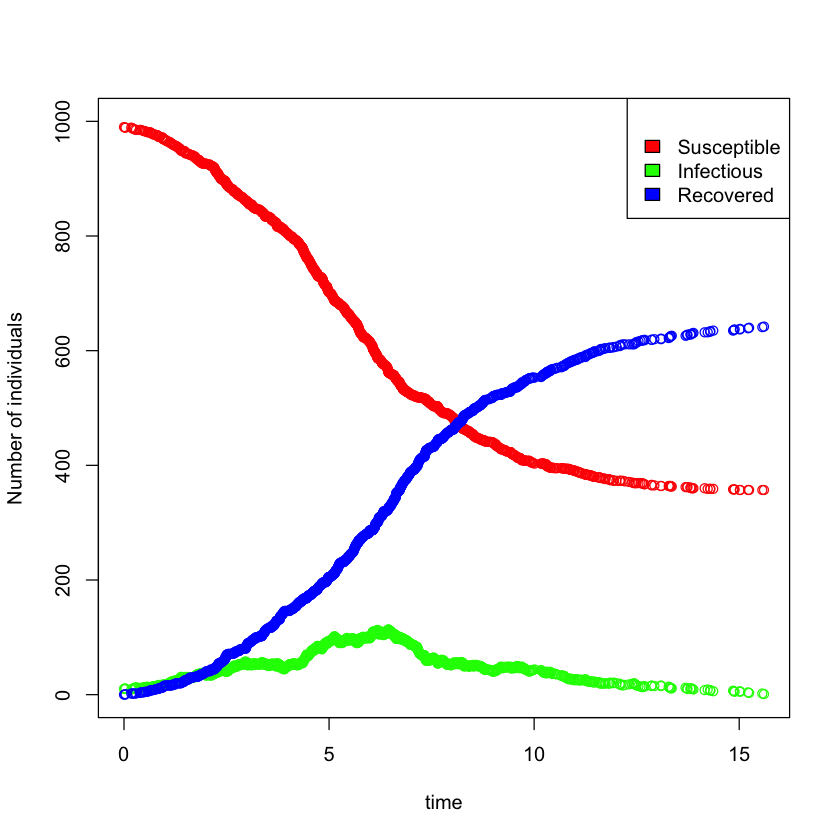

In [90]:
plot(x=times, y=sus.status, col="red", ylim=c(0, sus+inf+rec), main="", 
     ylab="Number of individuals", xlab="time")
points(x=times, y=inf.status, col="green")
points(x=times, y=rec.status, col="blue")
legend(x = "topright", legend = c("Susceptible", "Infectious", "Recovered"), fill = c("red", "green","blue"), 
       title = "")

In [91]:
png(filename="trajectory_big_epidemic.png", height=2000, width=2000, res=400)
plot(x=times, y=sus.status, col="red", ylim=c(0, sus+inf+rec), main="", 
     ylab="Number of individuals", xlab="time")
points(x=times, y=inf.status, col="green")
points(x=times, y=rec.status, col="blue")
legend(x = "topright", legend = c("Susceptible", "Infectious", "Recovered"), fill = c("red", "green","blue"), 
       title = "")
dev.off()

pdf 
  2

In [9]:
final.size <- c()

for (i in 1:10000){
    inf <- 10
    sus <- 1000 - inf
    rec <- 0

    Tf <- 500

    t <- 0

    sus.status <- c()
    inf.status <- c()
    rec.status <- c()
    times <- c()

    while(inf > 0 && t < Tf){
        sus.status <- c(sus.status, sus)   
        inf.status <- c(inf.status, inf)
        rec.status <- c(rec.status, rec)

        times <- c(times, t)

        tau <- rexp(n = 1, rate = lambda*sus*inf/(sus+inf+rec) + gamma*inf)

        t <- t + tau

        u <- runif(1)*(lambda*sus*inf/(sus+inf+rec) + gamma*inf)

        if (u < lambda*sus*inf/(sus+inf+rec)){
            sus <- sus - 1
            inf <- inf+1
        }
        else{
            inf <- inf-1
            rec <- rec+1
        }
    }
    
    final.size <- c(final.size, rec)
    }

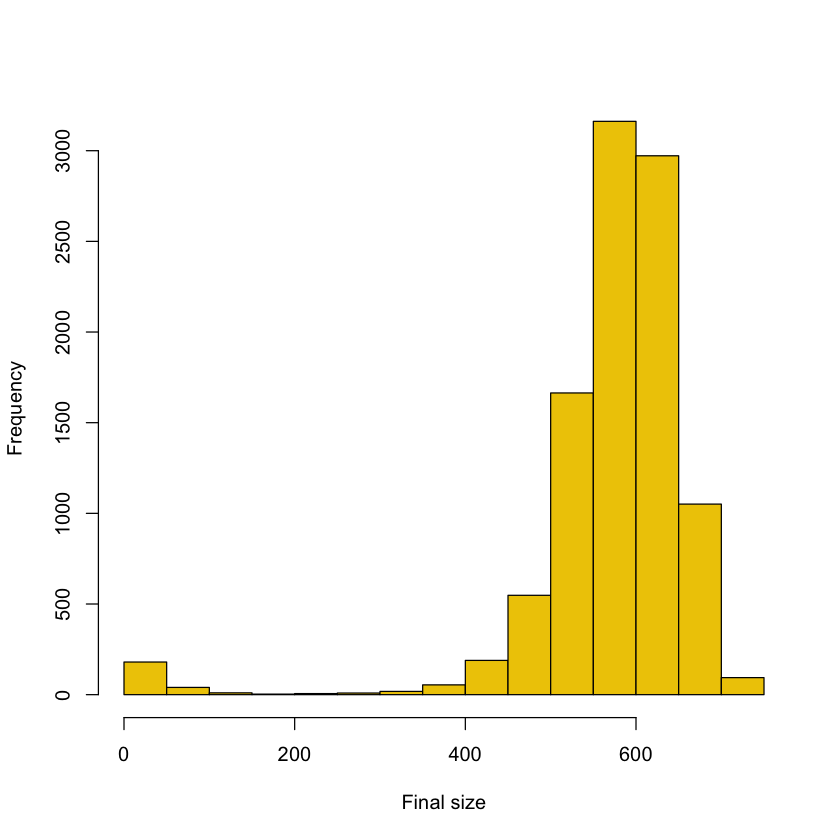

In [10]:
hist(final.size, xlab="Final size", col="gold2", main="")

In [12]:
png(filename="final_size_big_epidemic.png", height=2000, width=2000, res=400)
hist(final.size, xlab="Final size", col="gold2", main="")
dev.off()

pdf 
  2

******************
Stochastic general epidemic model

$\lambda = 3, \gamma = 1$

$R_0 = 3$

Initially infected: 1

Total population: 1,000

In [126]:
lambda <- 3
gamma <- 1

In [127]:
inf <- 5
sus <- 100000 - inf
rec <- 0

Tf <- 500

t <- 0

sus.status <- c()
inf.status <- c()
rec.status <- c()
times <- c()

while(inf > 0 && t < Tf){
    sus.status <- c(sus.status, sus)   
    inf.status <- c(inf.status, inf)
    rec.status <- c(rec.status, rec)

    times <- c(times, t)

    tau <- rexp(n = 1, rate = lambda*sus*inf/(sus+inf+rec) + gamma*inf)

    t <- t + tau

    u <- runif(1)*(lambda*sus*inf/(sus+inf+rec) + gamma*inf)

    if (u < lambda*sus*inf/(sus+inf+rec)){
        sus <- sus - 1
        inf <- inf+1
    }
    else{
        inf <- inf-1
        rec <- rec+1
    }
}

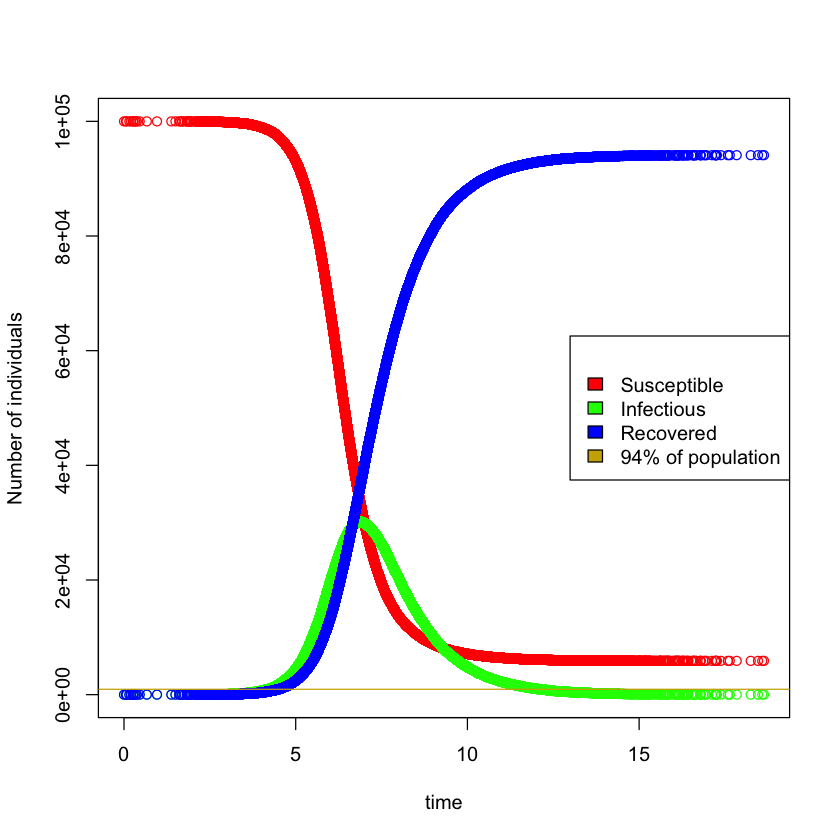

In [128]:
plot(x=times, y=sus.status, col="red", ylim=c(0, sus+inf+rec), main="", 
     ylab="Number of individuals", xlab="time")
points(x=times, y=inf.status, col="green")
points(x=times, y=rec.status, col="blue")
legend(x = "right", 
       legend = c("Susceptible", "Infectious", "Recovered", "94% of population"), 
       fill = c("red", "green","blue", "gold3"), 
       title = "")
abline(h=.94*1000, col="gold3")

In [125]:
png(filename="trajectory_r0_3.png", height=2000, width=2000, res=400)
plot(x=times, y=sus.status, col="red", ylim=c(0, sus+inf+rec), main="", 
     ylab="Number of individuals", xlab="time")
points(x=times, y=inf.status, col="green")
points(x=times, y=rec.status, col="blue")
legend(x = "right", 
       legend = c("Susceptible", "Infectious", "Recovered", "94% of population"), 
       fill = c("red", "green","blue", "gold3"), 
       title = "")
abline(h=.94*1000, col="gold3")
dev.off()

pdf 
  2